In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("diamonds.csv")

In [2]:
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [38]:
data.groupby('color')['price'].mean()

color
D    3169.954096
E    3076.752475
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64

In [2]:
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [40]:
data.groupby('clarity')['price'].mean()

clarity
I1      3924.168691
IF      2864.839106
SI1     3996.001148
SI2     5063.028606
VS1     3839.455391
VS2     3924.989395
VVS1    2523.114637
VVS2    3283.737071
Name: price, dtype: float64

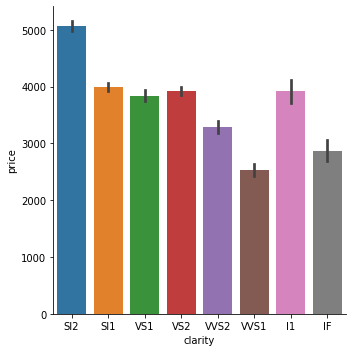

In [41]:
sns.catplot(x = 'clarity',y = 'price' ,kind = 'bar', data = data)
plt.show()

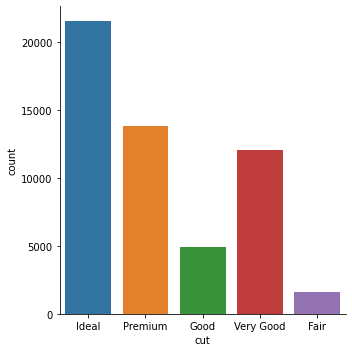

In [3]:
sns.catplot(x = 'cut', kind = 'count', data = data)
plt.show()

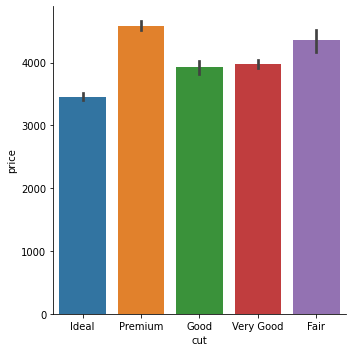

In [64]:
sns.catplot(x = 'cut', y = 'price' ,kind = 'bar', data = data)
plt.show()

In [39]:
data.groupby('color')['price'].mean()

color
D    3169.954096
E    3076.752475
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64

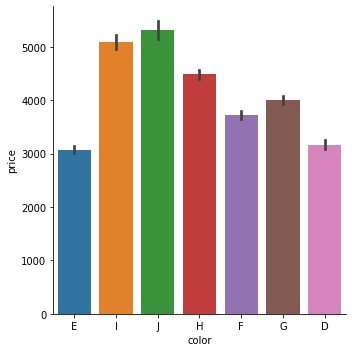

In [36]:
sns.catplot(x = 'color',y = 'price' ,kind = 'bar', data = data)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
y = data['price'].values

In [11]:
X = data[['carat', 'depth', 'table',
       'x', 'y', 'z']].values

In [9]:
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [10]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [14]:
reg = LinearRegression()
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print(rmse)

1479.5407441164818


In [19]:
# plt.scatter(X_test)

In [22]:
l =  y_pred - y_test
l.sum()
# poor modelining i.e underfitting

209813.31455330583

In [25]:
data.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


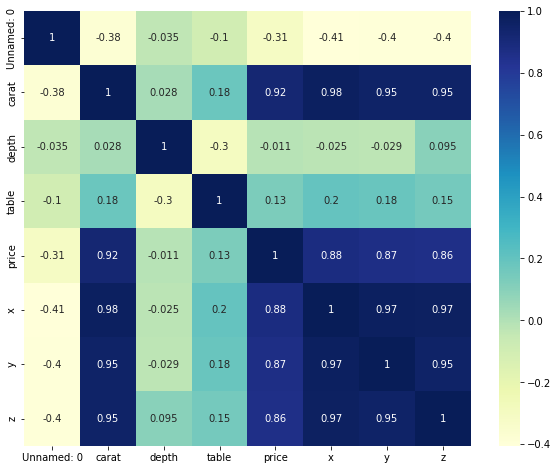

In [34]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [99]:
data = data.drop('Unnamed: 0',axis=1)

In [100]:
from sklearn.preprocessing import OneHotEncoder

In [101]:
df = pd.get_dummies(data.color)
df1 = pd.get_dummies(data.clarity)
df1

,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
53935,0,0,1,0,0,0,0,0
53936,0,0,1,0,0,0,0,0
53937,0,0,1,0,0,0,0,0
53938,0,0,0,1,0,0,0,0


In [102]:
df

,D,E,F,G,H,I,J
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
53935,1,0,0,0,0,0,0
53936,1,0,0,0,0,0,0
53937,1,0,0,0,0,0,0
53938,0,0,0,0,1,0,0


In [103]:
merged = pd.concat([data,df,df1], axis = 1)

In [104]:
merged = merged.drop('color', axis = 1)

In [105]:
merged = merged.drop('clarity', axis = 1)

In [106]:
merged

,carat,cut,depth,table,price,x,y,z,D,E,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,Ideal,61.5,55.0,326,3.95,3.98,2.43,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,Premium,59.8,61.0,326,3.89,3.84,2.31,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,Good,56.9,65.0,327,4.05,4.07,2.31,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,Premium,62.4,58.0,334,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,Good,63.3,58.0,335,4.34,4.35,2.75,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,60.8,57.0,2757,5.75,5.76,3.50,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,Good,63.1,55.0,2757,5.69,5.75,3.61,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,Very Good,62.8,60.0,2757,5.66,5.68,3.56,1,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,Premium,61.0,58.0,2757,6.15,6.12,3.74,0,0,...,0,0,0,0,0,1,0,0,0,0


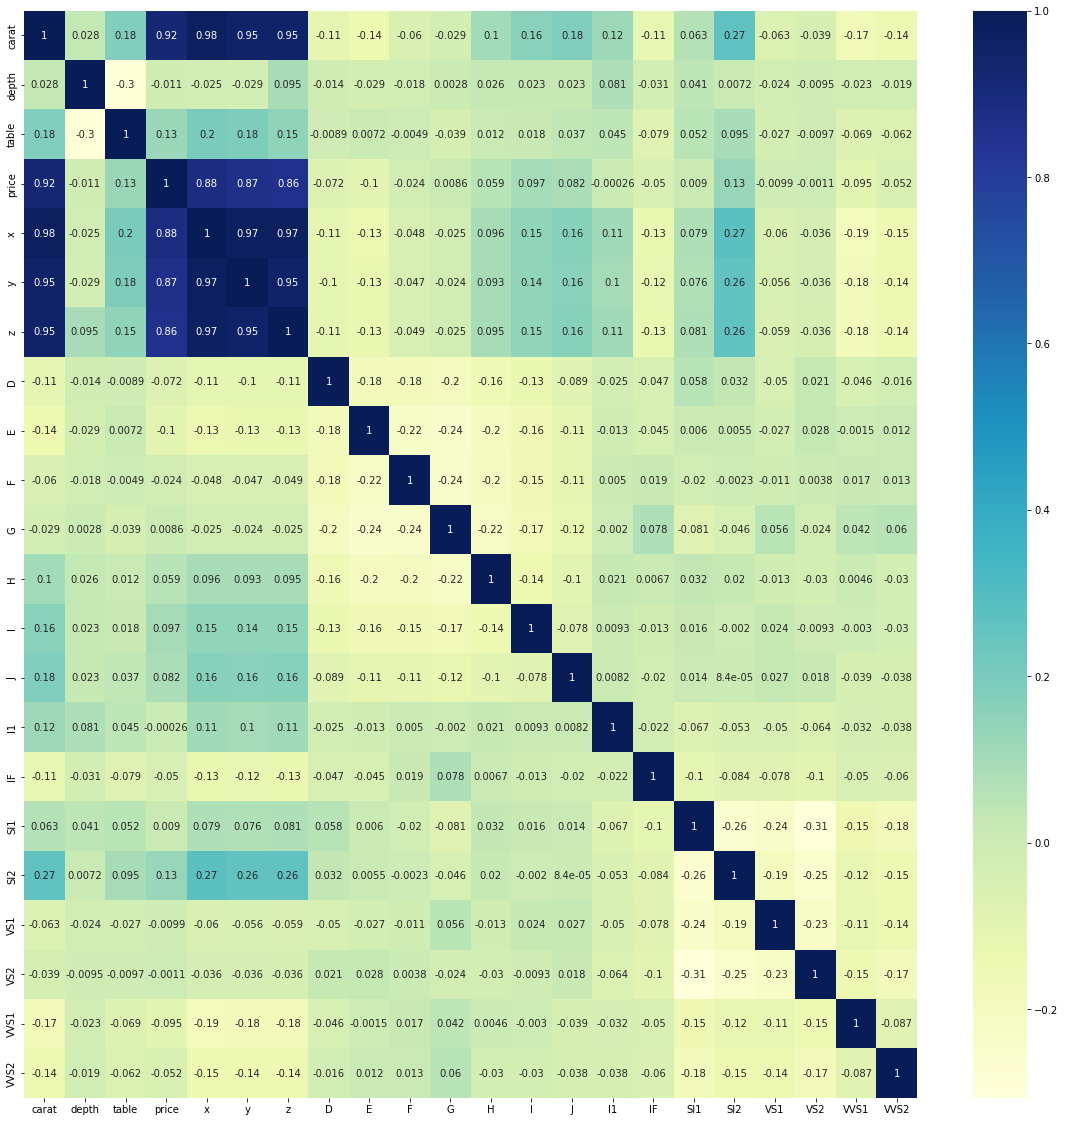

In [107]:
plt.figure(figsize = (20,20))
sns.heatmap(merged.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [108]:
y1 = merged['price'].values

In [109]:
x1 = merged.drop(['price','cut'], axis = 1).values

In [110]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.3, random_state = 42)
from sklearn.preprocessing import 

In [111]:
reg1 = LinearRegression()
reg1 = reg1.fit(x1_train, y1_train)
y1_pred = reg1.predict(x1_test)

In [112]:
rmse = np.sqrt(mean_squared_error(y1_pred, y1_test))
print(rmse)
#improved but still useless

1122.2754848115533


In [114]:
from sklearn.neighbors import KNeighborsClassifier
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [161]:
y2 = merged['cut'].values
x2 = merged.drop('cut', axis = 1).values
x2
# x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 42)

array([[ 0.23, 61.5 , 55.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.21, 59.8 , 61.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.23, 56.9 , 65.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.7 , 62.8 , 60.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.86, 61.  , 58.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.75, 62.2 , 55.  , ...,  0.  ,  0.  ,  0.  ]])

C:\Users\g ravindernath yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


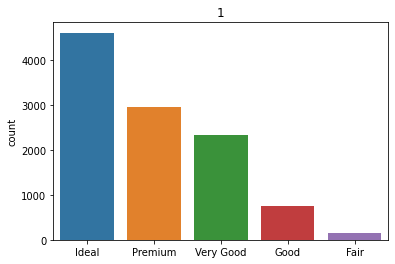

5915


C:\Users\g ravindernath yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


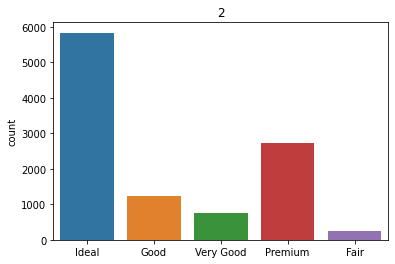

5950


C:\Users\g ravindernath yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


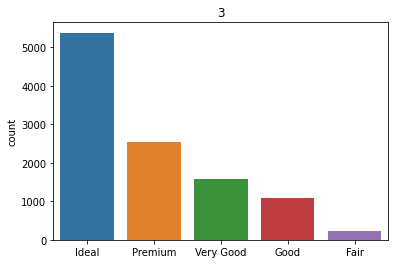

5859


C:\Users\g ravindernath yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


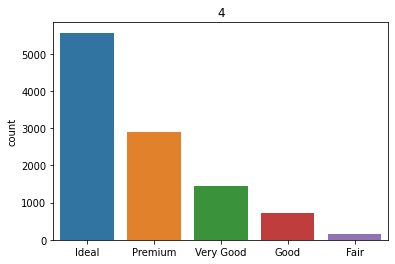

5942


C:\Users\g ravindernath yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


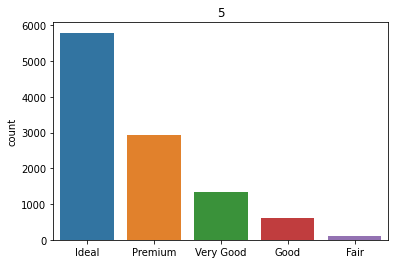

5940


C:\Users\g ravindernath yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


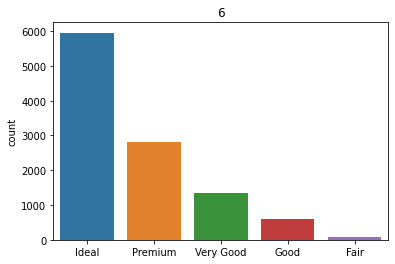

5892


C:\Users\g ravindernath yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


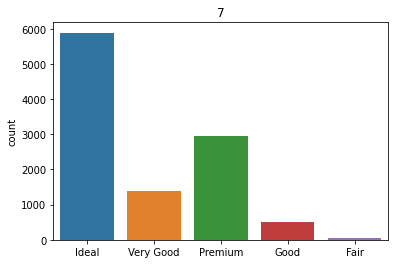

5852


C:\Users\g ravindernath yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


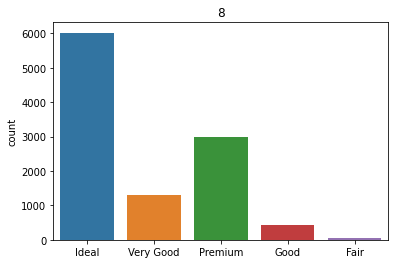

5826


C:\Users\g ravindernath yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


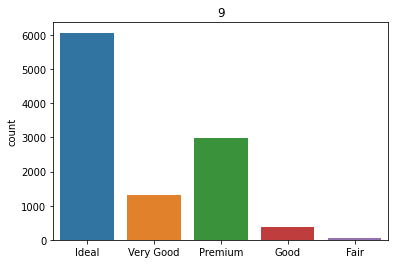

5770


C:\Users\g ravindernath yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


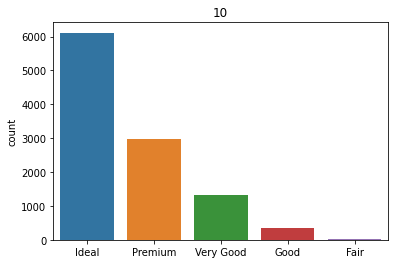

5774


C:\Users\g ravindernath yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


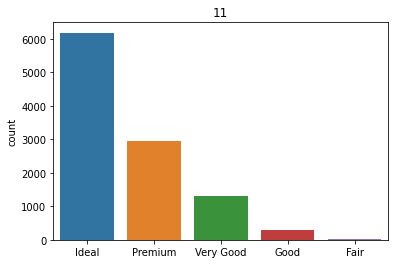

5744


C:\Users\g ravindernath yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


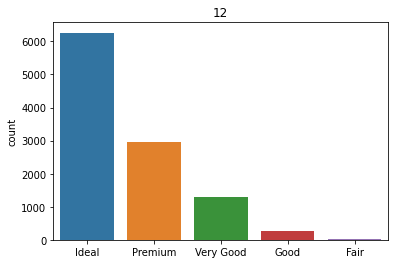

5717


C:\Users\g ravindernath yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


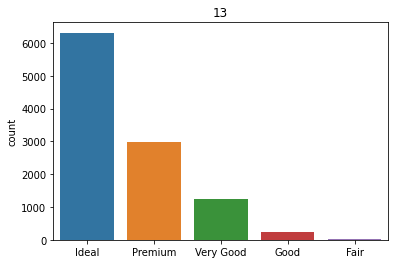

5651


C:\Users\g ravindernath yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


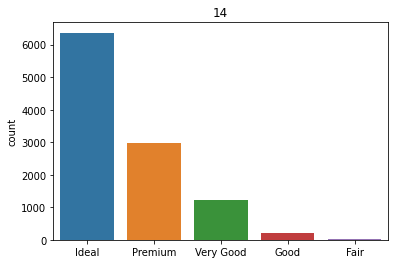

5613


C:\Users\g ravindernath yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


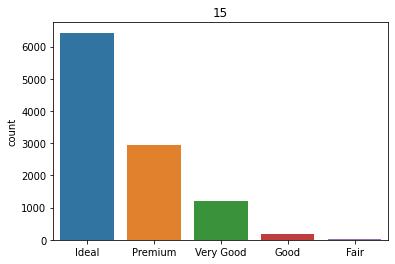

5574


C:\Users\g ravindernath yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


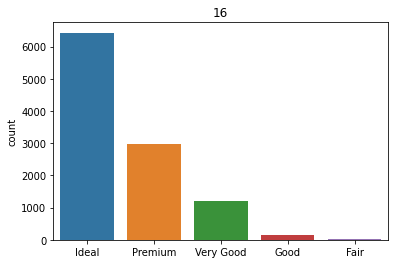

5551


C:\Users\g ravindernath yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


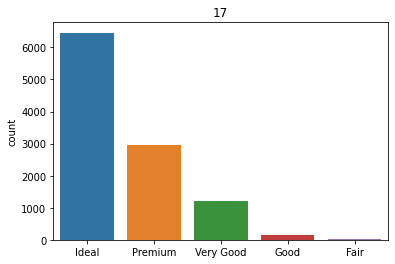

5548


C:\Users\g ravindernath yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


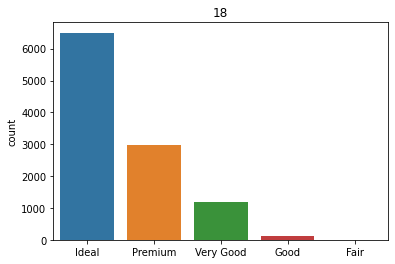

5502


C:\Users\g ravindernath yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


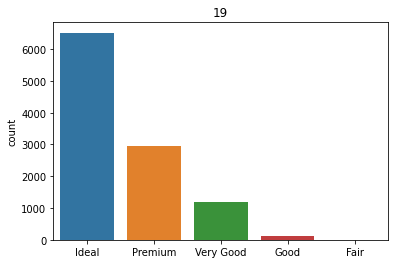

5468


In [157]:
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn = knn.fit(x2_train, y2_train)
    y2_pred =  knn.predict(x2_test)
    l = (y2_pred==y2_test).sum()
    sns.countplot(y2_pred)
    plt.title(i)
    plt.show()
    print(l)

In [139]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn = knn.fit(x2_train, y2_train)
y2_pred =  knn.predict(x2_test)
(y2_pred==y2_test).sum()

5942

C:\Users\g ravindernath yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


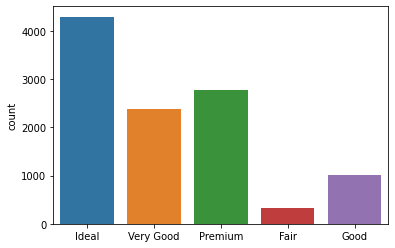

In [153]:
y2_test
sns.countplot(y2_test)
plt.show()

C:\Users\g ravindernath yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


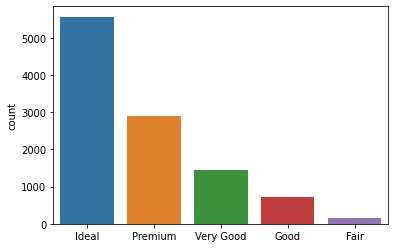

In [155]:
y2_pred
sns.countplot(y2_pred)

plt.show()

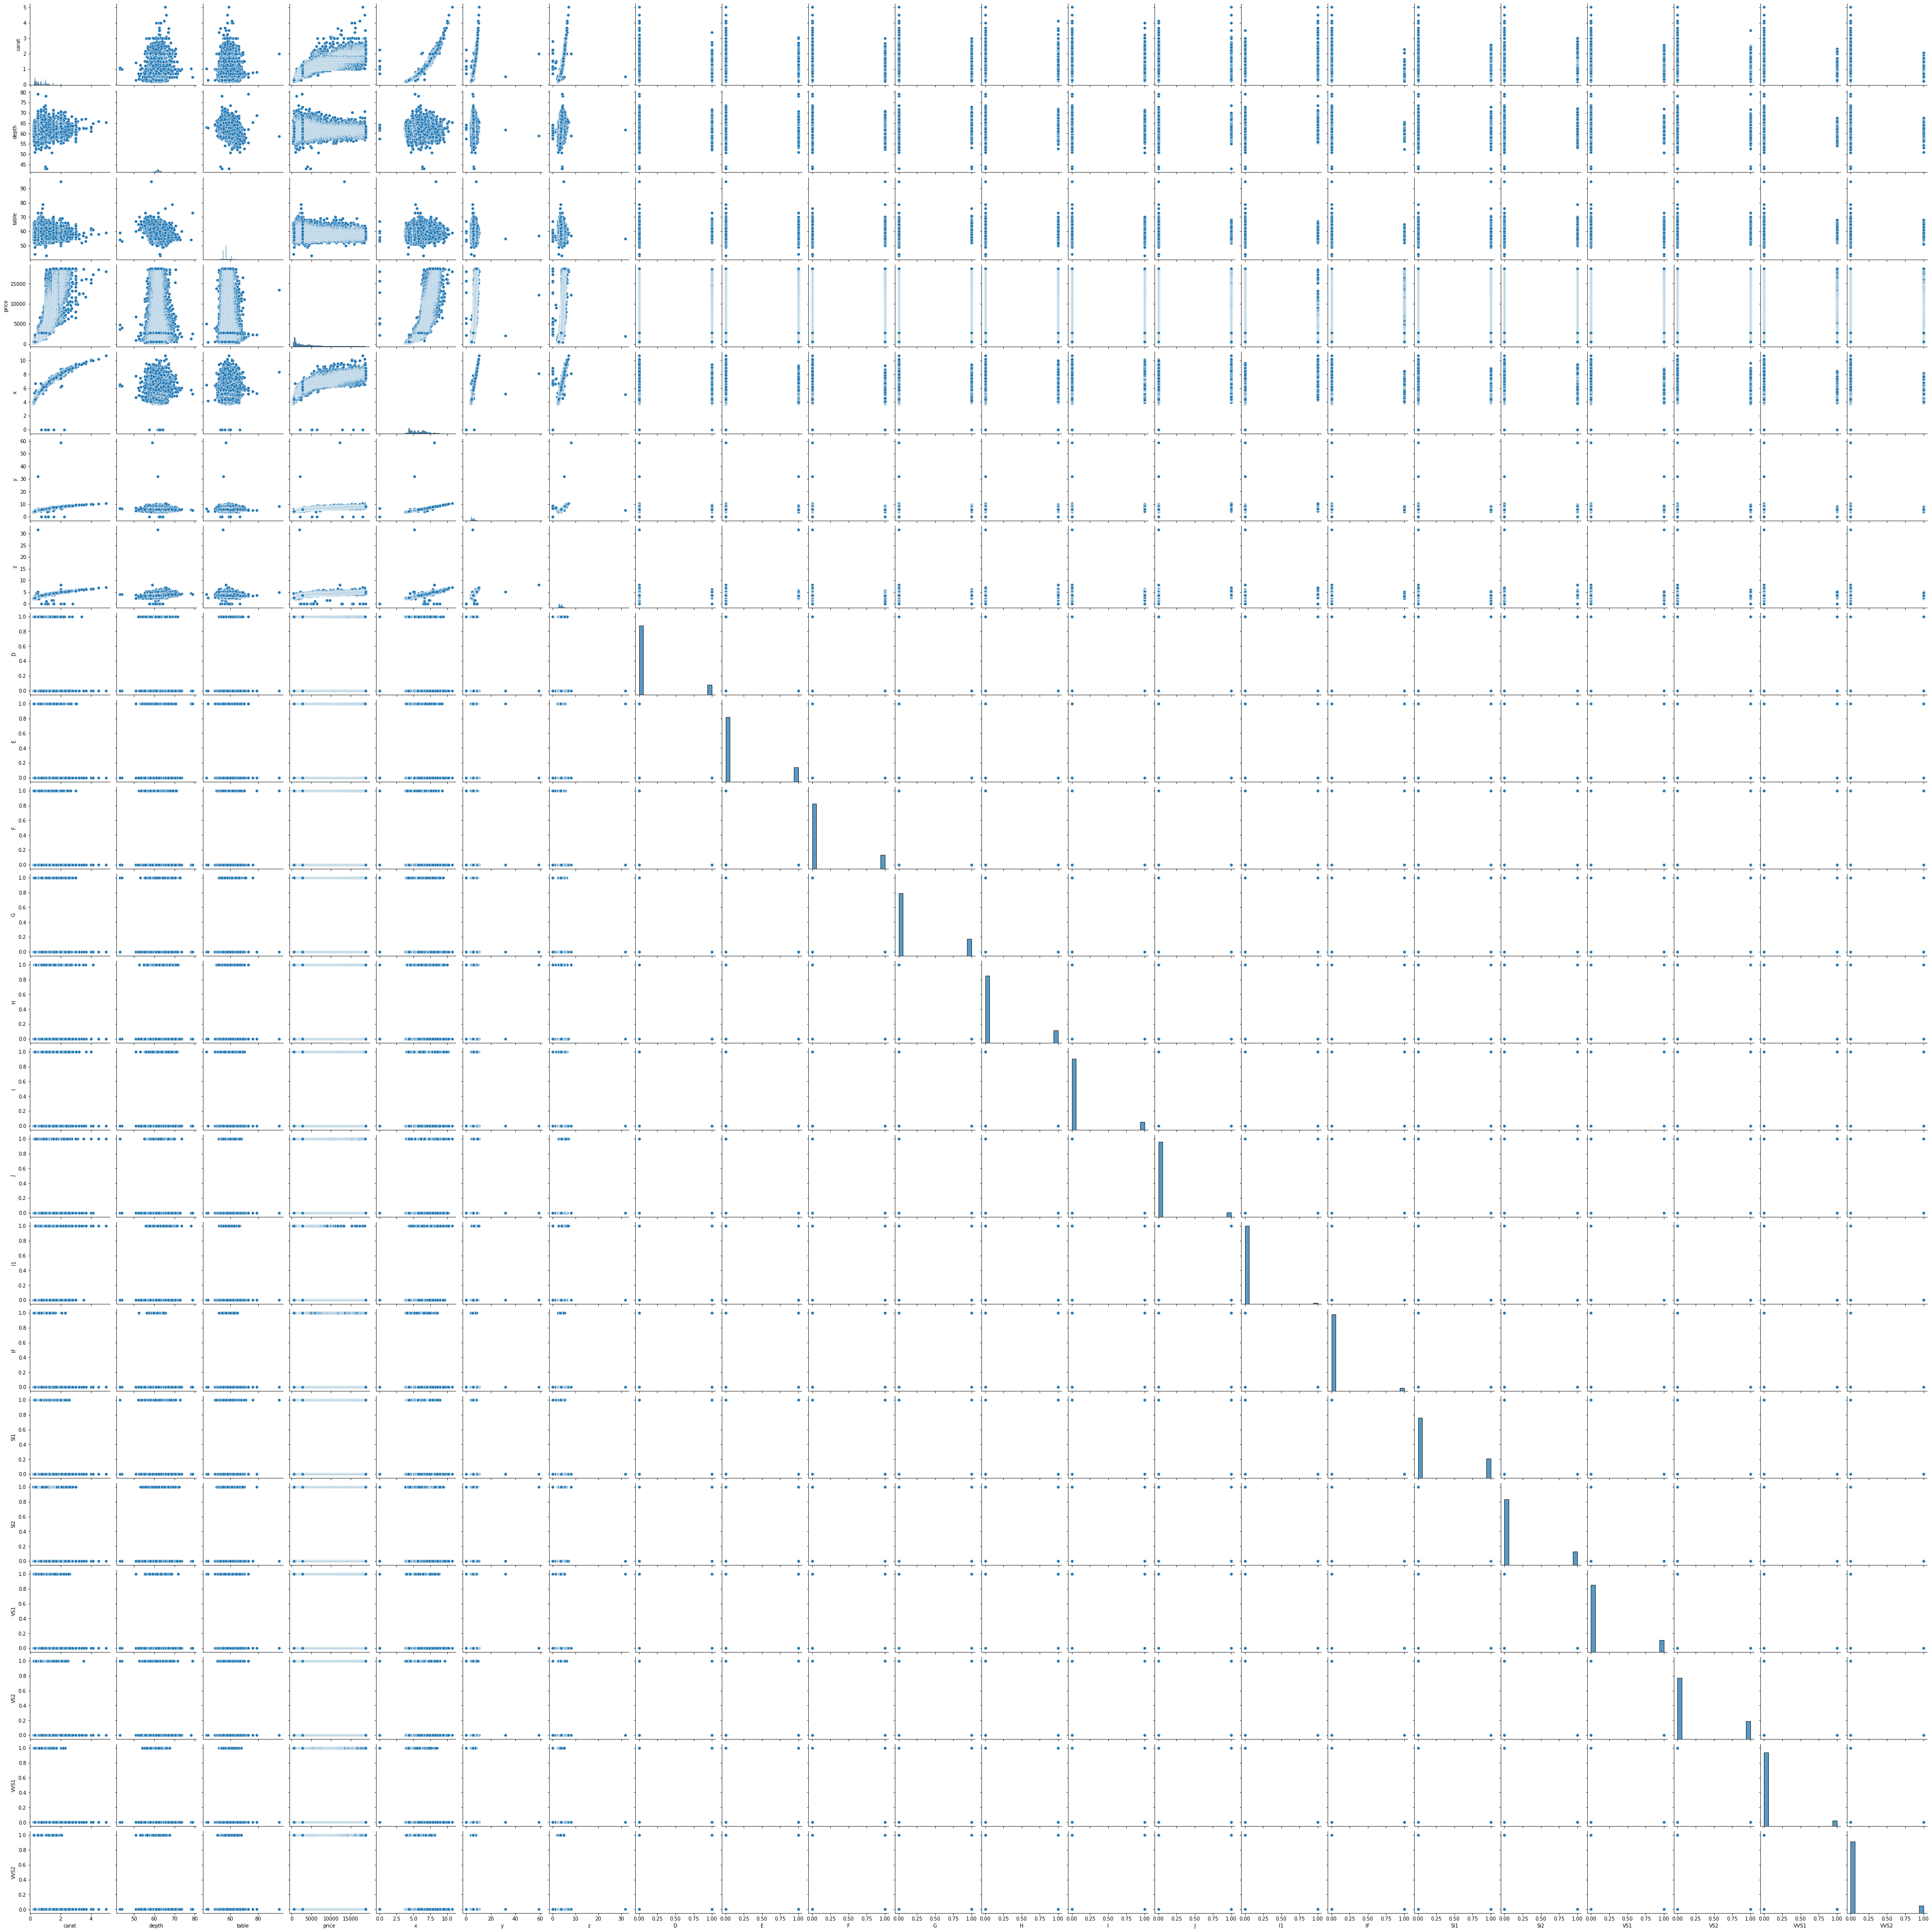

In [159]:
sns.pairplot(merged)
plt.show()

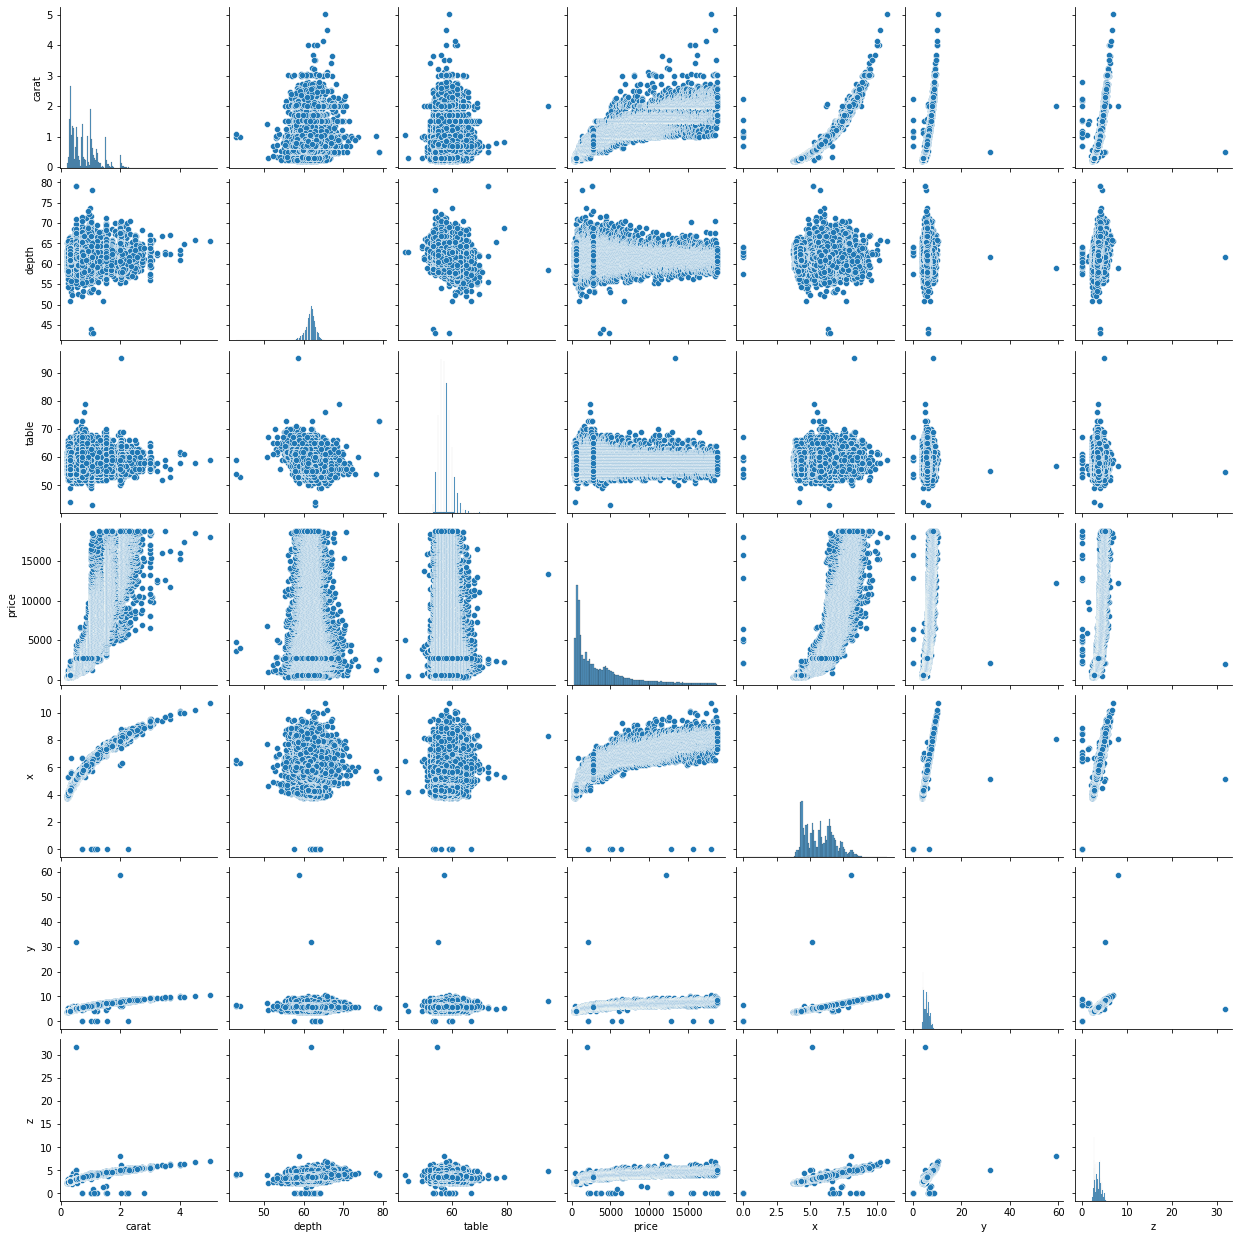

In [160]:
sns.pairplot(data)
plt.show()